In [ ]:
# Leitura do banco de dados SQLite
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
DATABASE_FILE = "dados_sensores.db"
engine = create_engine(f'sqlite:///{DATABASE_FILE}')

nome_tabela = "leituras_sensores"
query = f"SELECT * FROM {nome_tabela}"
try:
    df = pd.read_sql_query(query, engine,index_col='id')
    print("Dados lidos com sucesso:")
    print(df.head())
except Exception as e:
    print(f"\nOcorreu um erro ao ler o banco de dados: {e}")

df['timestamp'] = pd.to_datetime(df['timestamp'])

df = df.sort_values(by=['timestamp', 'tag'], ascending=[True, True]).reset_index(drop=True)#.head(50)
#df['timestamp'].mean()
#formula de padronização
 ## x'= (x - μ) / σ
# Necessário converter a coluna timestamp para Epoch time
#df['timestamp_epoch'] = df['timestamp'].astype(np.int64)
#display(df.describe())
df['tag'].value_counts()

Dados lidos com sucesso:
             tag description                   timestamp      value
id                                                                 
1   LIC_22311020   NÍVEL T01  2015-10-07 19:53:06.426635  60.242100
2   LIC_22311020   NÍVEL T01  2015-10-07 21:55:39.881011  60.715893
3   LIC_22311020   NÍVEL T01  2015-10-07 22:21:52.142013  59.573433
4   LIC_22311020   NÍVEL T01  2015-10-07 22:36:09.136001  59.805626
5   LIC_22311020   NÍVEL T01  2015-10-07 23:11:18.985000  60.222218


tag
LIC_22311020.MV       116081
LIC_22311020           87763
LIC_22311020.SV        60191
LIC_22311020.ES        59892
PX_22311020.TEMP       26174
PX_22311020.PRESS      23567
PX_22311020.DEVPOS     21528
PX_22311020.C1          3178
PX_22311020.OUT         3152
PX_22311020.RB          3147
PX_22311020.C2          3116
PX_22311020.DIFF        1376
Name: count, dtype: int64

In [ ]:
LIMITE_GAP = pd.Timedelta(minutes=10)

df['delta'] = df['timestamp'].diff()

df['novo_grupo'] = (df['delta'].isna()) | (df['delta'] > LIMITE_GAP)

df['grupo_id'] = df['novo_grupo'].cumsum()

df['timestamp_PADRAO'] = df.groupby('grupo_id')['timestamp'].transform('min')

df['concat_time_tag'] = df['timestamp_PADRAO'].astype(str) + '_' + df['tag']

df.drop_duplicates(subset=['concat_time_tag'], keep='first', inplace=True)



,tag,description,timestamp,value,delta,novo_grupo,grupo_id,timestamp_PADRAO,concat_time_tag
0,LIC_22311020,NÍVEL T01,2015-10-07 19:53:06.426635,60.242100,NaT,True,1,2015-10-07 19:53:06.426635,2015-10-07 19:53:06.426635_LIC_22311020
1,LIC_22311020.ES,NÍVEL T01 - Estado,2015-10-07 19:53:10.512130,1.000000,0 days 00:00:04.085495,False,1,2015-10-07 19:53:06.426635,2015-10-07 19:53:06.426635_LIC_22311020.ES
2,LIC_22311020.MV,NÍVEL T01 - Saida Valvula,2015-10-07 19:53:14.910888,35.170890,0 days 00:00:04.398758,False,1,2015-10-07 19:53:06.426635,2015-10-07 19:53:06.426635_LIC_22311020.MV
3,LIC_22311020.SV,NÍVEL T01 - Set Point,2015-10-07 19:53:23.740142,60.000000,0 days 00:00:08.829254,False,1,2015-10-07 19:53:06.426635,2015-10-07 19:53:06.426635_LIC_22311020.SV
4,LIC_22311020.MV,NÍVEL T01 - Saida Valvula,2015-10-07 20:26:39.569000,35.056427,0 days 00:33:15.828858,True,2,2015-10-07 20:26:39.569000,2015-10-07 20:26:39.569000_LIC_22311020.MV
...,...,...,...,...,...,...,...,...,...
409160,LIC_22311020.MV,NÍVEL T01 - Saida Valvula,2025-10-07 19:53:14.910888,14.207587,0 days 00:00:20.649887,False,167396,2025-10-07 19:46:32.369003,2025-10-07 19:46:32.369003_LIC_22311020.MV
409161,PX_22311020.DIFF,PRESSÃO DIFERENCIAL PV-22311020,2025-10-07 19:53:54.298263,1.853201,0 days 00:00:39.387375,False,167396,2025-10-07 19:46:32.369003,2025-10-07 19:46:32.369003_PX_22311020.DIFF
409162,PX_22311020.OUT,SAÍDA PV-22311020,2025-10-07 19:53:55.097000,57.585180,0 days 00:00:00.798737,False,167396,2025-10-07 19:46:32.369003,2025-10-07 19:46:32.369003_PX_22311020.OUT
409163,PX_22311020.RB,RETORNO PV-22311020,2025-10-07 19:53:55.097000,57.647842,0 days 00:00:00,False,167396,2025-10-07 19:46:32.369003,2025-10-07 19:46:32.369003_PX_22311020.RB


In [ ]:
AGREGAÇÃO = 'mean'

df_pivot = df.pivot_table(
    index='timestamp_PADRAO',  # Novo índice (o timestamp padronizado)
    columns='tag',             # Novas colunas (as tags)
    values='value',            # Valores que preencherão as células
    aggfunc=AGREGAÇÃO          # Como lidar com duplicatas
)

# Opcional: Renomear o índice para 'timestamp' e remover o nome da coluna de tags
df_pivot.index.name = 'timestamp'
df_pivot.columns.name = None


,LIC_22311020,LIC_22311020.ES,LIC_22311020.MV,LIC_22311020.SV,PX_22311020.C1,PX_22311020.C2,PX_22311020.DEVPOS,PX_22311020.DIFF,PX_22311020.OUT,PX_22311020.PRESS,PX_22311020.RB,PX_22311020.TEMP
timestamp,,,,,,,,,,,,
2015-10-07 19:53:06.426635,60.242100,1.0,35.170890,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-07 20:26:39.569000,NaN,NaN,35.056427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-07 21:54:03.531005,60.715893,NaN,39.748592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-07 22:21:52.142013,59.573433,1.0,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-07 22:46:02.619003,NaN,NaN,35.167740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-07 17:35:06.113006,NaN,NaN,13.585961,NaN,NaN,2.202151,-0.764614,NaN,49.36473,NaN,49.240295,NaN
2025-10-07 18:46:59.516006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.105816
2025-10-07 19:06:15.519012,NaN,NaN,NaN,NaN,3.261803,NaN,0.801861,0.896211,NaN,NaN,NaN,NaN


In [22]:
# 1. Defina a data de início para o filtro
data_inicio_filtro = pd.Timestamp('2025-08-26 00:00:00')

# 2. Crie a máscara booleana usando o ÍNDICE do df_pivot
filtro_temporal = df_pivot.index >= data_inicio_filtro

# 3. Aplique o filtro
df_filtrado = df_pivot[filtro_temporal]

df_filtrado

,LIC_22311020,LIC_22311020.ES,LIC_22311020.MV,LIC_22311020.SV,PX_22311020.C1,PX_22311020.C2,PX_22311020.DEVPOS,PX_22311020.DIFF,PX_22311020.OUT,PX_22311020.PRESS,PX_22311020.RB,PX_22311020.TEMP
timestamp,,,,,,,,,,,,
2025-08-26 00:14:02.296005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.296055,NaN,58.187264,NaN
2025-08-26 00:28:14.110000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.437632,NaN,NaN
2025-08-26 00:38:22.596008,NaN,NaN,NaN,NaN,4.635193,NaN,NaN,NaN,69.686700,NaN,69.584120,NaN
2025-08-26 00:57:38.551010,NaN,NaN,29.695100,NaN,NaN,NaN,0.696884,NaN,NaN,NaN,NaN,NaN
2025-08-26 01:31:30.627014,54.217567,1.0,20.968632,55.0,NaN,2.262366,0.002491,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-07 17:35:06.113006,NaN,NaN,13.585961,NaN,NaN,2.202151,-0.764614,NaN,49.364730,NaN,49.240295,NaN
2025-10-07 18:46:59.516006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.105816
2025-10-07 19:06:15.519012,NaN,NaN,NaN,NaN,3.261803,NaN,0.801861,0.896211,NaN,NaN,NaN,NaN


In [62]:

import time

list_tags = []
for index, row in df.iterrows():
    if list_tags == []:
        min_value = row['timestamp'] 
    
    if row['tag'] not in list_tags:
        print(f"Adicionando a tag {row['tag']} à lista.")
        list_tags.append(row['tag'])
        df.loc[index, 'timestamp_new'] = min_value
    else:
        print(f"A tag {row['tag']} já está na lista.")
        list_tags = []
        df.loc[index, 'timestamp_new'] = row['timestamp']
        min_value = row['timestamp']

df


    

Adicionando a tag LIC_22311020 à lista.
Adicionando a tag LIC_22311020.ES à lista.
Adicionando a tag LIC_22311020.MV à lista.
Adicionando a tag LIC_22311020.SV à lista.
A tag LIC_22311020.MV já está na lista.
Adicionando a tag LIC_22311020.MV à lista.
Adicionando a tag LIC_22311020 à lista.
A tag LIC_22311020 já está na lista.
Adicionando a tag LIC_22311020.ES à lista.
Adicionando a tag LIC_22311020.SV à lista.
Adicionando a tag LIC_22311020 à lista.
Adicionando a tag LIC_22311020.MV à lista.
A tag LIC_22311020.MV já está na lista.
Adicionando a tag LIC_22311020 à lista.
Adicionando a tag LIC_22311020.ES à lista.
Adicionando a tag LIC_22311020.SV à lista.
A tag LIC_22311020 já está na lista.
Adicionando a tag LIC_22311020.MV à lista.
Adicionando a tag LIC_22311020 à lista.
A tag LIC_22311020.MV já está na lista.
Adicionando a tag LIC_22311020.ES à lista.
Adicionando a tag LIC_22311020.SV à lista.
Adicionando a tag LIC_22311020 à lista.
Adicionando a tag LIC_22311020.MV à lista.
A tag L

,tag,description,timestamp,value,timestamp_new
0,LIC_22311020,NÍVEL T01,2015-10-07 19:53:06.426635,60.242100,2015-10-07 19:53:06.426635
1,LIC_22311020.ES,NÍVEL T01 - Estado,2015-10-07 19:53:10.512130,1.000000,2015-10-07 19:53:06.426635
2,LIC_22311020.MV,NÍVEL T01 - Saida Valvula,2015-10-07 19:53:14.910888,35.170890,2015-10-07 19:53:06.426635
3,LIC_22311020.SV,NÍVEL T01 - Set Point,2015-10-07 19:53:23.740142,60.000000,2015-10-07 19:53:06.426635
4,LIC_22311020.MV,NÍVEL T01 - Saida Valvula,2015-10-07 20:26:39.569000,35.056427,2015-10-07 20:26:39.569000
5,LIC_22311020.MV,NÍVEL T01 - Saida Valvula,2015-10-07 21:54:03.531005,39.748592,2015-10-07 21:54:03.531005
6,LIC_22311020,NÍVEL T01,2015-10-07 21:55:39.881011,60.715893,2015-10-07 21:54:03.531005
7,LIC_22311020,NÍVEL T01,2015-10-07 22:21:52.142013,59.573433,2015-10-07 22:21:52.142013
8,LIC_22311020.ES,NÍVEL T01 - Estado,2015-10-07 22:29:16.046005,1.000000,2015-10-07 22:29:16.046005
9,LIC_22311020.SV,NÍVEL T01 - Set Point,2015-10-07 22:29:16.046005,60.000000,2015-10-07 22:29:16.046005


In [ ]:
df['datetime_standardized'] = (df['timestamp_epoch'] - df['timestamp_epoch'].mean()) / df['timestamp_epoch'].std()
display(df.head())

,tag,description,timestamp,value,timestamp_epoch,datetime_standardized
id,,,,,,
1,LIC_22311020,NÍVEL T01,2015-10-07 19:53:06.426635,60.242100,1444247586426635000,-1.911379
2,LIC_22311020,NÍVEL T01,2015-10-07 21:55:39.881011,60.715893,1444254939881011000,-1.911302
3,LIC_22311020,NÍVEL T01,2015-10-07 22:21:52.142013,59.573433,1444256512142013000,-1.911286
4,LIC_22311020,NÍVEL T01,2015-10-07 22:36:09.136001,59.805626,1444257369136001000,-1.911277
5,LIC_22311020,NÍVEL T01,2015-10-07 23:11:18.985000,60.222218,1444259478985000000,-1.911255


In [45]:
# Salvar o DataFrame em um arquivo CSV
CSV_FILE = "dados_sensores.csv"
df.to_csv(CSV_FILE, index=False)
print(f"\nDados salvos com sucesso em {CSV_FILE}")


Dados salvos com sucesso em dados_sensores.csv


In [27]:
# Análise exploratória dos dados quantidade de leituras por tag e descrição
#print(df['description'].value_counts())
#print(df['tag'].value_counts())
#############df = df[df['tag'] == 'PX_22311020.RB']
#############df['timestamp'] = pd.to_datetime(df['timestamp'])
#############diferencas = df['timestamp'].diff()
#############diferencas.mean()

In [ ]:
# Obtendo o máximo e mínimo de data por tag
""" Essa etapa é importante para padronizar o timestamp de cada tag.
"""
list_distinct_tags = df['tag'].unique()

df_dates = pd.DataFrame(columns=['tag', 'max_timestamp', 'min_timestamp'])
for tag in list_distinct_tags:
    df_tag = df[df['tag'] == tag]
    max_timestamp = df_tag['timestamp'].max()
    min_timestamp = df_tag['timestamp'].min()
    df_dates = pd.concat(
        [df_dates, pd.DataFrame({'tag': [tag], 'max_timestamp': [max_timestamp], 'min_timestamp': [min_timestamp]})],
        ignore_index=True
    )
df_dates['max_timestamp'] = pd.to_datetime(df_dates['max_timestamp'])
df_dates['min_timestamp'] = pd.to_datetime(df_dates['min_timestamp'])
df_dates


,tag,max_timestamp,min_timestamp
0,LIC_22311020,2025-10-07 19:46:32.369003,2015-10-07 19:53:06.426635
1,LIC_22311020.ES,2025-10-07 19:47:04.314010,2015-10-07 19:53:10.512130
2,LIC_22311020.MV,2025-10-07 19:53:14.910888,2015-10-07 19:53:14.910888
3,LIC_22311020.SV,2025-10-07 19:47:04.314010,2015-10-07 19:53:23.740142
4,PX_22311020.C1,2025-10-07 19:52:54.256011,2025-07-02 12:07:58.167007
5,PX_22311020.C2,2025-10-07 19:50:52.572006,2025-07-02 12:04:23.199005
6,PX_22311020.DEVPOS,2025-10-07 19:52:54.261001,2023-03-09 19:09:05.682006
7,PX_22311020.DIFF,2025-10-07 19:53:54.298263,2025-08-26 19:22:48.026000
8,PX_22311020.OUT,2025-10-07 19:53:55.097000,2025-07-02 12:11:24.026000
9,PX_22311020.PRESS,2025-10-07 19:52:54.256011,2023-03-09 19:13:08.042999


In [43]:
# tempo médio entre leituras por tag
#df['timestamp'] = pd.to_datetime(df['timestamp'])
df_diff = pd.DataFrame(columns=['tag', 'mean_diff'])
for tag in list_distinct_tags:
    df_tag = df[df['tag'] == tag]
    diferencas = df_tag['timestamp'].diff()
    #print(f"Tag: {tag}, Tempo médio entre leituras: {diferencas.mean()}")
    df_diff = pd.concat([df_diff, pd.DataFrame({'tag': [tag], 'mean_diff': [diferencas.mean()]})], ignore_index=True)

display(df_diff )
print(df_diff['mean_diff'].min())



C:\Users\wateu\AppData\Local\Temp\ipykernel_21936\312500302.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_diff = pd.concat([df_diff, pd.DataFrame({'tag': [tag], 'mean_diff': [diferencas.mean()]})], ignore_index=True)


,tag,mean_diff
0,LIC_22311020,0 days 00:59:56.303707098
1,LIC_22311020.ES,0 days 01:27:49.887525703
2,LIC_22311020.MV,0 days 00:45:18.980013783
3,LIC_22311020.SV,0 days 01:27:23.708599
4,PX_22311020.C1,0 days 00:44:06.740978597
5,PX_22311020.C2,0 days 00:44:59.450842054
6,PX_22311020.DEVPOS,0 days 01:03:04.913298601
7,PX_22311020.DIFF,0 days 00:44:00.484561645
8,PX_22311020.OUT,0 days 00:44:28.534138686
9,PX_22311020.PRESS,0 days 00:57:37.421124204


0 days 00:44:00.484561645


In [30]:
display(df_dates['max_timestamp'].max())
display(df_dates['max_timestamp'].min())

Timestamp('2025-10-07 19:53:55.097000')

Timestamp('2025-10-07 19:46:32.369003')

In [31]:
display(df_dates['min_timestamp'].max())
display(df_dates['min_timestamp'].min())

Timestamp('2025-08-26 19:22:48.026000')

Timestamp('2015-10-07 19:53:06.426635')

Data Inicial: 2015-10-07 19:53:06.426635
Data Final: 2025-10-07 19:53:55.097000
Intervalo (Delta) Usado: 0 days 00:44:00.484561645
Número Total de Pontos Gerados: 119532


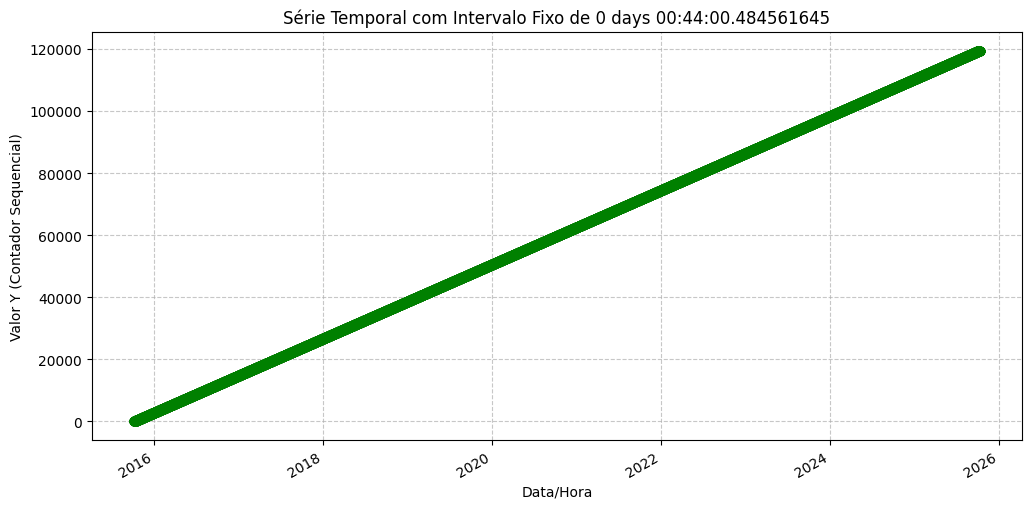


Primeiras 5 e Últimas 5 Linhas do Resultado:
                      Timestamp  Y_Value
0 2015-10-07 19:53:06.426635000        1
1 2015-10-07 20:37:06.911196645        2
2 2015-10-07 21:21:07.395758290        3
3 2015-10-07 22:05:07.880319935        4
4 2015-10-07 22:49:08.364881580        5
                           Timestamp  Y_Value
119527 2025-10-07 17:06:24.626376915   119528
119528 2025-10-07 17:50:25.110938560   119529
119529 2025-10-07 18:34:25.595500205   119530
119530 2025-10-07 19:18:26.080061850   119531
119531 2025-10-07 19:53:55.097000000   119532


In [34]:
# Plotar serie normalizada esperada 
import matplotlib.pyplot as plt
import numpy as np

start_date = df_dates['min_timestamp'].min()
end_date = df_dates['max_timestamp'].max()
interval = df_diff['mean_diff'].min()

#Gerar a série de datas (eixo X)
dates_list = []
current_date = start_date

#Loop para gerar os pontos de tempo, garantindo o intervalo exato
while current_date <= end_date:
    dates_list.append(current_date)
    current_date += interval

dates = pd.Series(dates_list)

if not dates.empty and dates.iloc[-1] > end_date:
    dates = dates.iloc[:-1] # Remove o último que ultrapassou

# Se o último ponto gerado for ANTES do end_date, ou se a lista estava vazia:
if dates.empty or dates.iloc[-1] < end_date:
    # Adiciona a data final como o ponto de término
    dates = pd.concat([dates, pd.Series([end_date])], ignore_index=True)


# 5. Gerar a série de valores Y
# O Y começa em 1 e aumenta em 1 para cada ponto (1, 2, 3, ...)
y_values = np.arange(1, len(dates) + 1)

# 6. Criar o DataFrame final
df_result = pd.DataFrame({'Timestamp': dates, 'Y_Value': y_values})


# --- Resultados e Plotagem ---
print(f"Data Inicial: {start_date}")
print(f"Data Final: {end_date}")
print(f"Intervalo (Delta) Usado: {interval}")
print(f"Número Total de Pontos Gerados: {len(df_result)}")

# 7. Plotar o gráfico (série temporal)
plt.figure(figsize=(12, 6))
plt.plot(df_result['Timestamp'], df_result['Y_Value'], marker='o', linestyle='-', color='g')

# Títulos e rótulos
plt.title(f'Série Temporal com Intervalo Fixo de {interval}')
plt.xlabel('Data/Hora')
plt.ylabel('Valor Y (Contador Sequencial)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.gcf().autofmt_xdate() # Formatar o eixo X para datas

plt.show()

# Mostrar as primeiras e últimas linhas do DataFrame
print("\nPrimeiras 5 e Últimas 5 Linhas do Resultado:")
print(df_result.head())
print(df_result.tail())